True Demand: 17519 observations
Apparent Demand: 17519 observations
Net Demand: 17519 observations


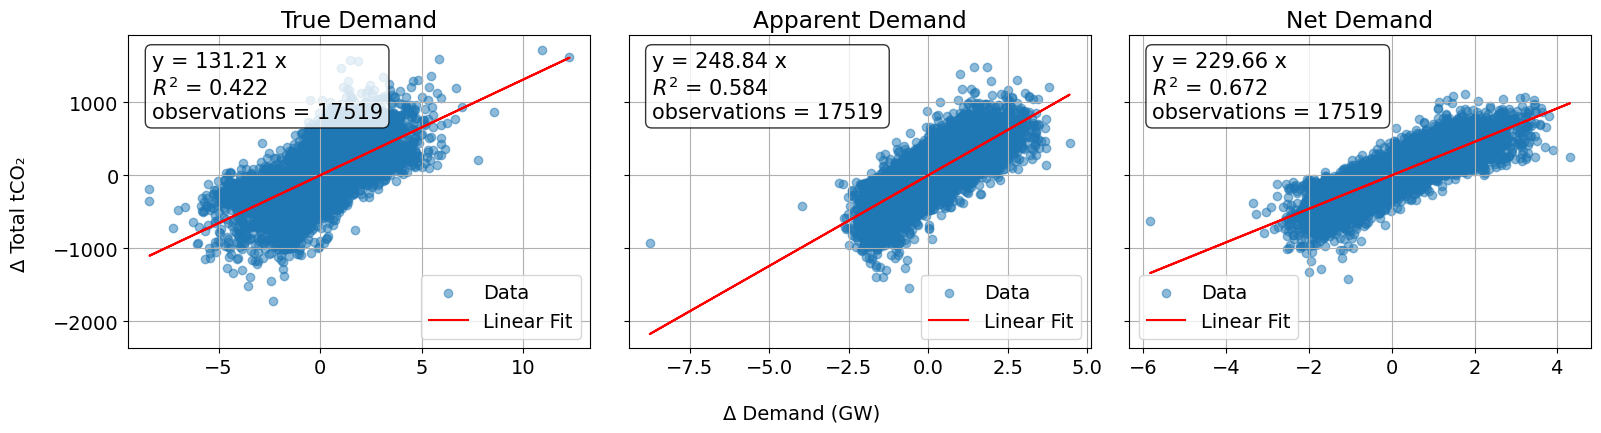

In [6]:
# Change the y axis to kt CO2 and x axis to GW
# now with intercepts set to zero

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# === GLOBAL FONT SIZES (min 14) ===
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
# === Load and prepare data ===
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Convert date and create datetime
df['SettlementDate'] = pd.to_datetime(df['SettlementDate'], format="%d/%m/%Y")
df['datetime'] = df['SettlementDate'] + pd.to_timedelta((df['SettlementPeriod'] - 1) * 30, unit='m')
df = df.sort_values('datetime')

# Compute CO₂ values at each settlement period (kgCO2)
df['CO2_True'] = df['GBTrueDemand'] * df['CarbonIntensityActualGB']
df['CO2_Apparent'] = df['GBApparentDemand'] * df['CarbonIntensityActualGB']
df['CO2_Net'] = df['GBNetDemand'] * df['CarbonIntensityActualGB']

# Compute settlement-to-settlement changes (MW and kgCO2)
df['Δ_TrueDemand'] = df['GBTrueDemand'].diff()
df['Δ_ApparentDemand'] = df['GBApparentDemand'].diff()
df['Δ_NetDemand'] = df['GBNetDemand'].diff()
df['Δ_CO2_True'] = df['CO2_True'].diff()
df['Δ_CO2_Apparent'] = df['CO2_Apparent'].diff()
df['Δ_CO2_Net'] = df['CO2_Net'].diff()

# Drop the first row (which will contain NaNs from the diff)
df = df.dropna(subset=[
    'Δ_TrueDemand', 'Δ_ApparentDemand', 'Δ_NetDemand',
    'Δ_CO2_True', 'Δ_CO2_Apparent', 'Δ_CO2_Net'
])

# === Set up the 1x3 subplot layout ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_data = [
    ('Δ_TrueDemand', 'Δ_CO2_True', 'True Demand'),
    ('Δ_ApparentDemand', 'Δ_CO2_Apparent', 'Apparent Demand'),
    ('Δ_NetDemand', 'Δ_CO2_Net', 'Net Demand')
]

for ax, (x_col, y_col, title) in zip(axes, plot_data):
    # Scale for plotting & fitting:
    #   MW -> GW (÷1000), kgCO2 -> tCO2 (÷1e3)
    x = (df[x_col].values.reshape(-1, 1)) / 1000.0
    y = (df[y_col].values.reshape(-1, 1)) / 1_000.0

    # Print number of observations
    print(f"{title}: {len(x)} observations")

    # Fit regression (through origin) in scaled units
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_pred = reg.predict(x)
    slope = reg.coef_[0][0]      # units: ktCO2 per GW  (≡ gCO2/kWh numerically)
    r_squared = reg.score(x, y)

    # Scatter and regression line
    ax.scatter(x.ravel(), y.ravel(), alpha=0.5, label='Data')
    ax.plot(x.ravel(), y_pred.ravel(), color='red', label='Linear Fit')

    # Title and annotation
    ax.set_title(f'{title}')
    eq = (
        f'y = {slope:.2f} x'
        f'\n$R^2$ = {r_squared:.3f}'
        f'\nobservations = {len(x)}'
    )
    ax.text(0.05, 0.95, eq, transform=ax.transAxes,
            fontsize=15, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.legend()
    ax.grid(True)

# === Add common x and y axis labels ===
fig.supxlabel('Δ Demand (GW)', fontsize=14, y=0.08)
fig.supylabel('Δ Total tCO₂', fontsize=14, x=0.06)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Leave space for shared labels
plt.show()


True Demand: 17519 observations
Apparent Demand: 17519 observations
Net Demand: 17519 observations


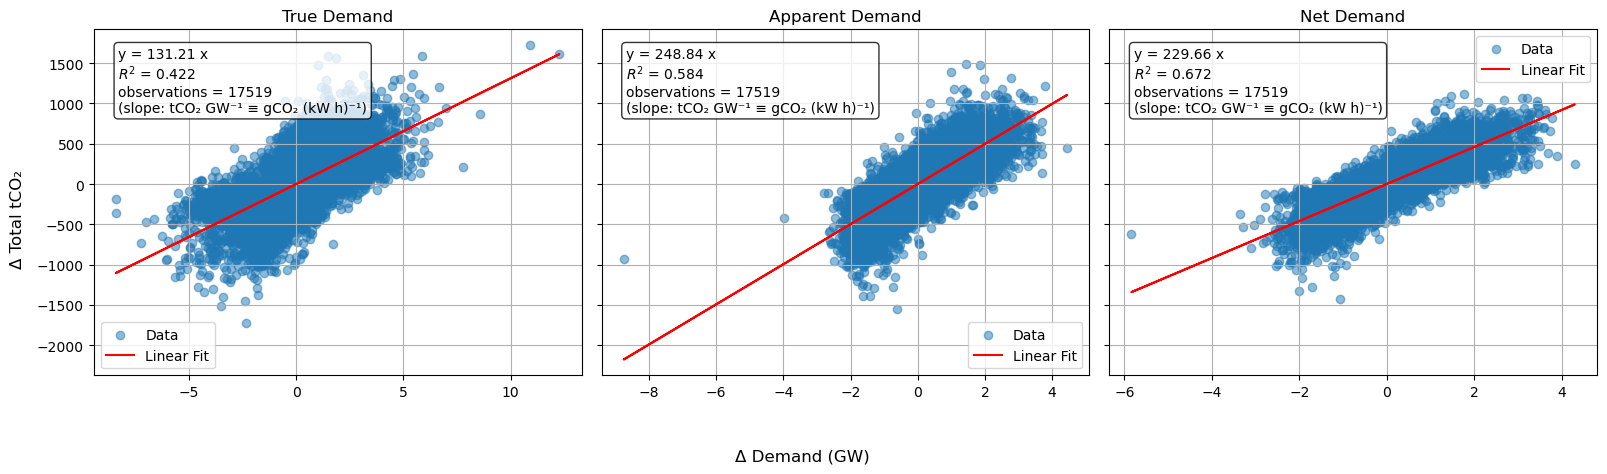

In [21]:
# Change the y axis to kt CO2 and x axis to GW
# now with intercepts set to zero

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === Load and prepare data ===
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Convert date and create datetime
df['SettlementDate'] = pd.to_datetime(df['SettlementDate'], format="%d/%m/%Y")
df['datetime'] = df['SettlementDate'] + pd.to_timedelta((df['SettlementPeriod'] - 1) * 30, unit='m')
df = df.sort_values('datetime')

# Compute CO₂ values at each settlement period (kgCO2)
df['CO2_True'] = df['GBTrueDemand'] * df['CarbonIntensityActualGB']
df['CO2_Apparent'] = df['GBApparentDemand'] * df['CarbonIntensityActualGB']
df['CO2_Net'] = df['GBNetDemand'] * df['CarbonIntensityActualGB']

# Compute settlement-to-settlement changes (MW and kgCO2)
df['Δ_TrueDemand'] = df['GBTrueDemand'].diff()
df['Δ_ApparentDemand'] = df['GBApparentDemand'].diff()
df['Δ_NetDemand'] = df['GBNetDemand'].diff()
df['Δ_CO2_True'] = df['CO2_True'].diff()
df['Δ_CO2_Apparent'] = df['CO2_Apparent'].diff()
df['Δ_CO2_Net'] = df['CO2_Net'].diff()

# Drop the first row (which will contain NaNs from the diff)
df = df.dropna(subset=[
    'Δ_TrueDemand', 'Δ_ApparentDemand', 'Δ_NetDemand',
    'Δ_CO2_True', 'Δ_CO2_Apparent', 'Δ_CO2_Net'
])

# === Set up the 1x3 subplot layout ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_data = [
    ('Δ_TrueDemand', 'Δ_CO2_True', 'True Demand'),
    ('Δ_ApparentDemand', 'Δ_CO2_Apparent', 'Apparent Demand'),
    ('Δ_NetDemand', 'Δ_CO2_Net', 'Net Demand')
]

for ax, (x_col, y_col, title) in zip(axes, plot_data):
    # Scale for plotting & fitting:
    #   MW -> GW (÷1000), kgCO2 -> tCO2 (÷1e3)
    x = (df[x_col].values.reshape(-1, 1)) / 1000.0
    y = (df[y_col].values.reshape(-1, 1)) / 1_000.0

    # Print number of observations
    print(f"{title}: {len(x)} observations")

    # Fit regression (through origin) in scaled units
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_pred = reg.predict(x)
    slope = reg.coef_[0][0]      # units: ktCO2 per GW  (≡ gCO2/kWh numerically)
    r_squared = reg.score(x, y)

    # Scatter and regression line
    ax.scatter(x.ravel(), y.ravel(), alpha=0.5, label='Data')
    ax.plot(x.ravel(), y_pred.ravel(), color='red', label='Linear Fit')

    # Title and annotation
    ax.set_title(f'{title}')
    eq = (
        f'y = {slope:.2f} x'
        f'\n$R^2$ = {r_squared:.3f}'
        f'\nobservations = {len(x)}'
        f'\n(slope: tCO₂ GW⁻¹ ≡ gCO₂ (kW h)⁻¹)'
    )
    ax.text(0.05, 0.95, eq, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.legend()
    ax.grid(True)

# === Add common x and y axis labels ===
fig.supxlabel('Δ Demand (GW)', fontsize=12)
fig.supylabel('Δ Total tCO₂', fontsize=12, x=0.06)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Leave space for shared labels
plt.show()


True Demand: 17519 observations
Apparent Demand: 17519 observations
Net Demand: 17519 observations


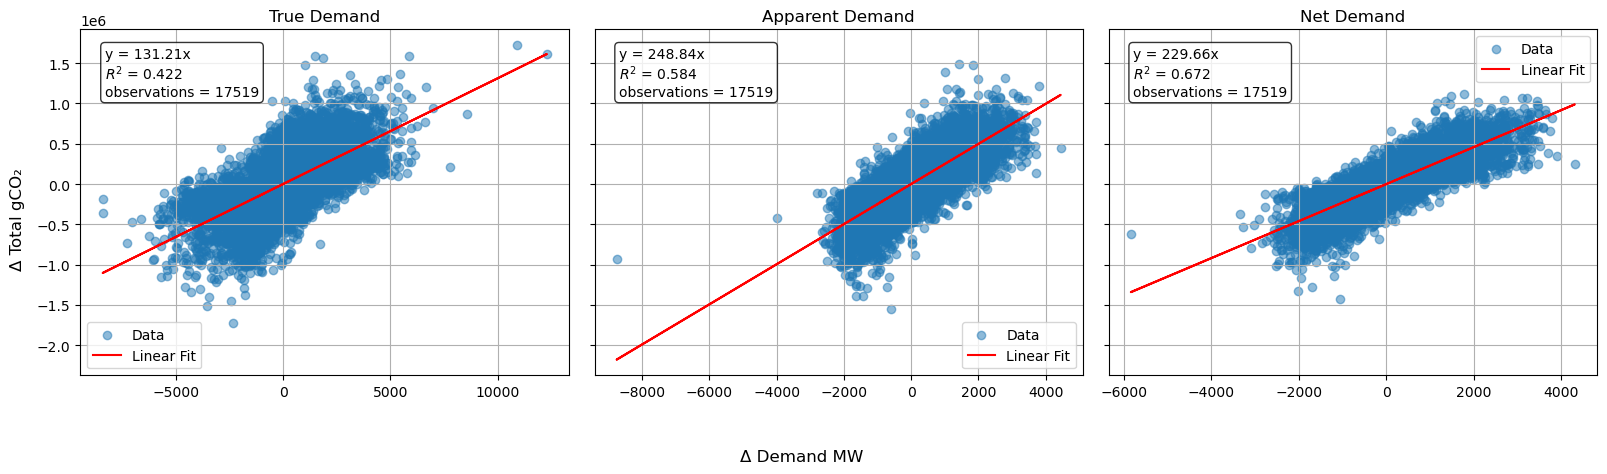

In [12]:
#Change the y axis to kt CO2
#now with intercepts set to zero

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === Load and prepare data ===
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Convert date and create datetime
df['SettlementDate'] = pd.to_datetime(df['SettlementDate'], format="%d/%m/%Y")
df['datetime'] = df['SettlementDate'] + pd.to_timedelta((df['SettlementPeriod'] - 1) * 30, unit='m')
df = df.sort_values('datetime')

# Compute CO₂ values at each settlement period
df['CO2_True'] = df['GBTrueDemand'] * df['CarbonIntensityActualGB']
df['CO2_Apparent'] = df['GBApparentDemand'] * df['CarbonIntensityActualGB']
df['CO2_Net'] = df['GBNetDemand'] * df['CarbonIntensityActualGB']

# Compute settlement-to-settlement changes
df['Δ_TrueDemand'] = df['GBTrueDemand'].diff()
df['Δ_ApparentDemand'] = df['GBApparentDemand'].diff()
df['Δ_NetDemand'] = df['GBNetDemand'].diff()

df['Δ_CO2_True'] = df['CO2_True'].diff()
df['Δ_CO2_Apparent'] = df['CO2_Apparent'].diff()
df['Δ_CO2_Net'] = df['CO2_Net'].diff()

# Drop the first row (which will contain NaNs from the diff)
df = df.dropna(subset=[
    'Δ_TrueDemand', 'Δ_ApparentDemand', 'Δ_NetDemand',
    'Δ_CO2_True', 'Δ_CO2_Apparent', 'Δ_CO2_Net'
])

# === Set up the 1x3 subplot layout ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_data = [
    ('Δ_TrueDemand', 'Δ_CO2_True', 'True Demand'),
    ('Δ_ApparentDemand', 'Δ_CO2_Apparent', 'Apparent Demand'),
    ('Δ_NetDemand', 'Δ_CO2_Net', 'Net Demand')
]

for ax, (x_col, y_col, title) in zip(axes, plot_data):
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values.reshape(-1, 1)

    # Print number of observations
    print(f"{title}: {len(x)} observations")

    # Fit regression
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_pred = reg.predict(x)
    slope = reg.coef_[0][0]
    r_squared = reg.score(x, y)

    # Scatter and regression line
    ax.scatter(x, y, alpha=0.5, label='Data')
    ax.plot(x, y_pred, color='red', label='Linear Fit')

    # Title and annotation
    ax.set_title(f'{title}')
    eq = f'y = {slope:.2f}x\n$R^2$ = {r_squared:.3f}\nobservations = {len(x)}'
    ax.text(0.05, 0.95, eq, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.legend()
    ax.grid(True)

# === Add common x and y axis labels ===
fig.supxlabel('Δ Demand MW', fontsize=12)
fig.supylabel('Δ Total gCO₂', fontsize=12, x=0.06)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Leave space for shared labels
plt.show()


True Demand: 17519 observations
Apparent Demand: 17519 observations
Net Demand: 17519 observations


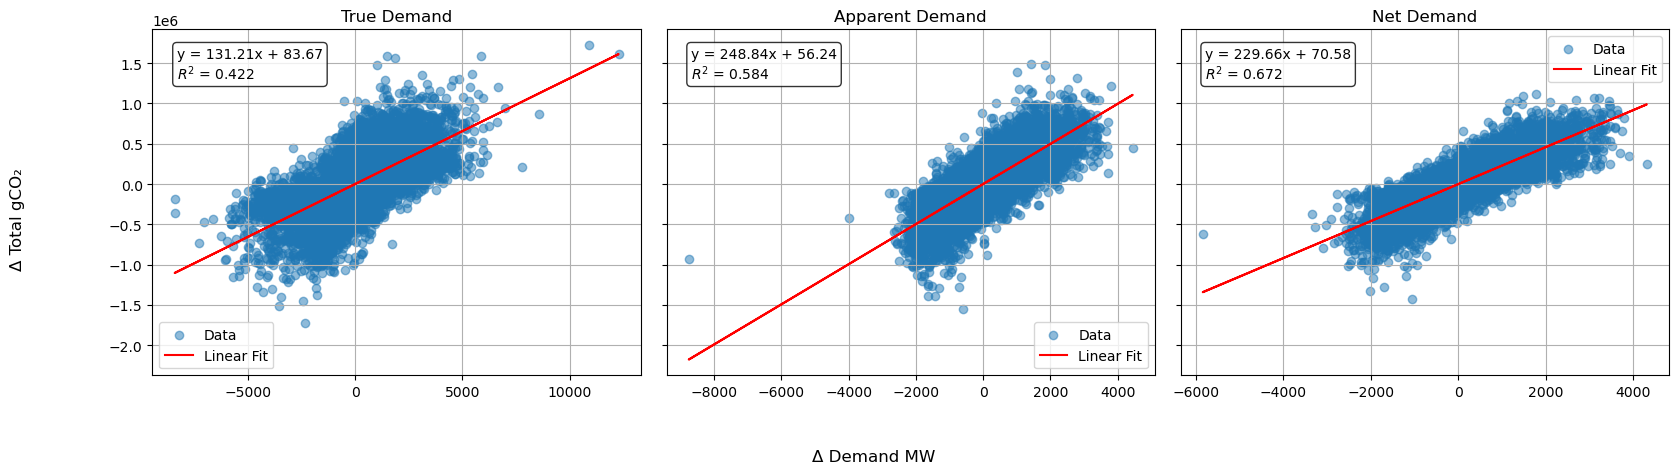

In [1]:
#Change the y axis to kt CO2

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === Load and prepare data ===
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Data_1Jul24_to_30Jun25.csv"
df = pd.read_csv(csv_path)

# Convert date and create datetime
df['SettlementDate'] = pd.to_datetime(df['SettlementDate'], format="%d/%m/%Y")
df['datetime'] = df['SettlementDate'] + pd.to_timedelta((df['SettlementPeriod'] - 1) * 30, unit='m')
df = df.sort_values('datetime')

# Compute CO₂ values at each settlement period
df['CO2_True'] = df['GBTrueDemand'] * df['CarbonIntensityActualGB']
df['CO2_Apparent'] = df['GBApparentDemand'] * df['CarbonIntensityActualGB']
df['CO2_Net'] = df['GBNetDemand'] * df['CarbonIntensityActualGB']

# Compute settlement-to-settlement changes
df['Δ_TrueDemand'] = df['GBTrueDemand'].diff()
df['Δ_ApparentDemand'] = df['GBApparentDemand'].diff()
df['Δ_NetDemand'] = df['GBNetDemand'].diff()

df['Δ_CO2_True'] = df['CO2_True'].diff()
df['Δ_CO2_Apparent'] = df['CO2_Apparent'].diff()
df['Δ_CO2_Net'] = df['CO2_Net'].diff()

# Drop the first row (which will contain NaNs from the diff)
df = df.dropna(subset=[
    'Δ_TrueDemand', 'Δ_ApparentDemand', 'Δ_NetDemand',
    'Δ_CO2_True', 'Δ_CO2_Apparent', 'Δ_CO2_Net'
])

# === Set up the 1x3 subplot layout ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_data = [
    ('Δ_TrueDemand', 'Δ_CO2_True', 'True Demand'),
    ('Δ_ApparentDemand', 'Δ_CO2_Apparent', 'Apparent Demand'),
    ('Δ_NetDemand', 'Δ_CO2_Net', 'Net Demand')
]

for ax, (x_col, y_col, title) in zip(axes, plot_data):
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values.reshape(-1, 1)

    # Print number of observations
    print(f"{title}: {len(x)} observations")

    # Fit regression
    reg = LinearRegression().fit(x, y)
    y_pred = reg.predict(x)
    slope = reg.coef_[0][0]
    intercept = reg.intercept_[0]
    r_squared = reg.score(x, y)

    # Scatter and regression line
    ax.scatter(x, y, alpha=0.5, label='Data')
    ax.plot(x, y_pred, color='red', label='Linear Fit')

    # Title and annotation
    ax.set_title(f'{title}')
    eq = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.3f}'
    ax.text(0.05, 0.95, eq, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.legend()
    ax.grid(True)

# === Add common x and y axis labels ===
fig.supxlabel('Δ Demand MW', fontsize=12)
fig.supylabel('Δ Total gCO₂', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Leave space for shared labels
plt.show()
